In [1]:
%load_ext autoreload

In [2]:
import numpy as np
from scipy.stats import itemfreq
import networkx as nx
import pandas as pd

import matplotlib
import seaborn as sns
sns.set_palette('colorblind')
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['font.size'] = 30
matplotlib.rcParams['xtick.major.size'] = 9
matplotlib.rcParams['ytick.major.size'] = 9
matplotlib.rcParams['xtick.minor.size'] = 4
matplotlib.rcParams['ytick.minor.size'] = 4

matplotlib.rcParams['axes.linewidth'] = 2

matplotlib.rcParams['xtick.major.width'] = 2
matplotlib.rcParams['ytick.major.width'] = 2
matplotlib.rcParams['xtick.minor.width'] = 2
matplotlib.rcParams['ytick.minor.width'] = 2

matplotlib.rcParams['figure.figsize'] = [10, 8]
matplotlib.rcParams['text.usetex'] = True

import random

from toysimulations import Network

import pickle

In [3]:
import networkx as nx

In [4]:
G = nx.grid_2d_graph(5,5)
pos = {n:n for n in G}

/home/dmanik/toy-ridesharing/venv/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/dmanik/toy-ridesharing/venv/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


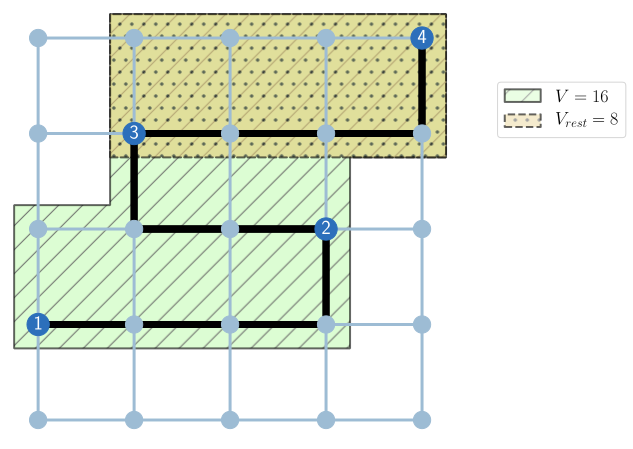

In [5]:
import matplotlib.patches as patches
from matplotlib.path import Path

fig, ax = plt.subplots(figsize=(8,8))
ax.axis('off')


bg_elems_color = "xkcd:light grey blue"
draw_nodes_kwargs = dict(node_color = bg_elems_color, alpha=1.0)
draw_stop_kwargs = dict(node_size=500, node_color = "xkcd:medium blue", alpha=1)

draw_edge_kwargs = dict(width=3, edge_color=bg_elems_color, alpha=1.0)
draw_path_kwargs = dict(width=7, color='black')

volume_patch_kwargs = dict(lw=2, zorder=-3, capstyle='round', joinstyle='bevel', alpha=0.6)


nx.draw_networkx_edges(G, pos=pos, ax=ax, **draw_edge_kwargs)
nx.draw_networkx_nodes(G, pos=pos, ax=ax, **draw_nodes_kwargs)


path = [(0, 1), (3,1), (3,2), (1,2), (1,3), (4,3), (4,4)]
stoplist = [(0,1), (3,2), (1,3), (4,4)]

e = 0.25
vol_polygon_vertices = [(0-e,1-e), (3+e,1-e), (3+e,3-e), (4+e,3-e), (4+e,4+e), (1-e,4+e), (1-e,2+e), (0-e,2+e), (0-e, 1-e)]
vol_rest_polygon_vertices = [(1-e,3-e), (4+e,3-e), (4+e,4+e), (1-e,4+e), (1-e,3-e)]

edges_in_path = [(u,v) for u,v in zip(path[:-1], path[1:]) for n in nx.shortest_path(G, u,v)]


nx.draw_networkx_edges(G, pos=pos, edgelist=edges_in_path, ax=ax, **draw_path_kwargs)
nx.draw_networkx_nodes(G, pos=pos, nodelist=stoplist, ax=ax, **draw_stop_kwargs)
nx.draw_networkx_labels(G, pos=pos, labels={(0,1): 1, (3,2): 2, (1,3):3, (4,4):4}, ax=ax, font_size=20, font_color='w')



# patch for v
codes_v = [Path.MOVETO] + [Path.LINETO]*(len(vol_polygon_vertices)-2) + [Path.CLOSEPOLY]
path_v = Path(vol_polygon_vertices, codes_v)
patch_v = patches.PathPatch(path_v, hatch='/', facecolor='xkcd:pale green', label = r'$V=16$', **volume_patch_kwargs)

codes_vrest = [Path.MOVETO] + [Path.LINETO]*(len(vol_rest_polygon_vertices)-2) + [Path.CLOSEPOLY]
path_vrest = Path(vol_rest_polygon_vertices, codes_vrest)
patch_vrest = patches.PathPatch(path_vrest, hatch='.', ls='--', facecolor='xkcd:sand', label = r'$V_{rest}=8$', **volume_patch_kwargs)

ax.add_patch(patch_v)
ax.add_patch(patch_vrest)
ax.legend(loc=(1.1,0.7), fontsize=18)

## Now make a two panel plot

In [6]:
bg_elems_color = "xkcd:light grey blue"
draw_nodes_kwargs = dict(node_color = bg_elems_color, alpha=1.0)
draw_stop_kwargs = dict(node_size=500, node_color = "xkcd:medium blue", alpha=1)

draw_edge_kwargs = dict(width=3, edge_color=bg_elems_color, alpha=1.0)
draw_path_kwargs = dict(width=7, color='black')

volume_patch_kwargs = dict(lw=2, zorder=-3, capstyle='round', joinstyle='bevel', alpha=0.6)


nx.draw_networkx_edges(G, pos=pos, ax=ax, **draw_edge_kwargs)
nx.draw_networkx_nodes(G, pos=pos, ax=ax, **draw_nodes_kwargs)


path = [(0, 1), (3,1), (3,2), (1,2), (1,3), (4,3), (4,4)]
stoplist = [(0,1), (3,2), (1,3), (4,4)]

e = 0.25
vol_polygon_vertices = [(0-e,1-e), (3+e,1-e), (3+e,3-e), (4+e,3-e), (4+e,4+e), (1-e,4+e), (1-e,2+e), (0-e,2+e), (0-e, 1-e)]
vol_rest_polygon_vertices = [(1-e,3-e), (4+e,3-e), (4+e,4+e), (1-e,4+e), (1-e,3-e)]

edges_in_path = [(u,v) for u,v in zip(path[:-1], path[1:]) for n in nx.shortest_path(G, u,v)]

# patch for v




/home/dmanik/toy-ridesharing/venv/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/dmanik/toy-ridesharing/venv/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


In [7]:
def plot_base(ax):
    
    nx.draw_networkx_edges(G, pos=pos, ax=ax, **draw_edge_kwargs)
    nx.draw_networkx_nodes(G, pos=pos, ax=ax, **draw_nodes_kwargs)

    nx.draw_networkx_edges(G, pos=pos, edgelist=edges_in_path, ax=ax, **draw_path_kwargs)
    nx.draw_networkx_nodes(G, pos=pos, nodelist=stoplist, ax=ax, **draw_stop_kwargs)
    nx.draw_networkx_labels(G, pos=pos, labels={(0,1): 1, (3,2): 2, (1,3):3, (4,4):4}, ax=ax, font_size=20, font_color='w')

def plot_v(ax):
    codes_v = [Path.MOVETO] + [Path.LINETO]*(len(vol_polygon_vertices)-2) + [Path.CLOSEPOLY]
    path_v = Path(vol_polygon_vertices, codes_v)
    patch_v = patches.PathPatch(path_v, hatch='/', facecolor='xkcd:pale green', label = r'$V=16$', **volume_patch_kwargs)
    ax.add_patch(patch_v)
    
def plot_vrest(ax):
    codes_vrest = [Path.MOVETO] + [Path.LINETO]*(len(vol_rest_polygon_vertices)-2) + [Path.CLOSEPOLY]
    path_vrest = Path(vol_rest_polygon_vertices, codes_vrest)
    patch_vrest = patches.PathPatch(path_vrest, hatch='.', ls='--', facecolor='xkcd:sand', label = r'$V_{\textsf{rest}}=8$', **volume_patch_kwargs)
    ax.add_patch(patch_vrest)

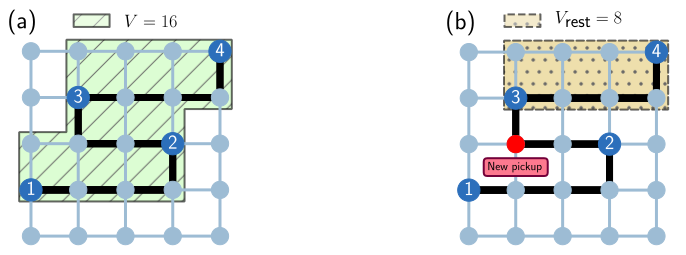

In [8]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,4), gridspec_kw={'wspace': 0.9})
ax1.axis('off')
ax2.axis('off')

plot_base(ax1)
plot_v(ax1)
ax1.legend(loc='upper center', fontsize=18, bbox_to_anchor=(0.5, 1.15), frameon=False)
ax1.text(-0.5, 4.5, "(a)", fontsize=25)


plot_base(ax2)
plot_vrest(ax2)

nx.draw_networkx_nodes(G, pos=pos, nodelist=[(1,2)], ax=ax2)

bbox_props = dict(boxstyle="round,pad=0.3", fc="xkcd:carnation", ec="xkcd:merlot", lw=2)
t = ax2.text(1, 2-0.5, "New pickup", ha="center", va="center", 
            size=12,
            bbox=bbox_props)
ax2.legend(loc='upper center', fontsize=18, bbox_to_anchor=(0.5, 1.15), frameon=False)
ax2.text(-0.5, 4.5, "(b)", fontsize=25)


#fig.tight_layout()
fig.savefig("v_and_v_rest_illustration.pdf", bbox_inches='tight')

## Illustrations on the coarse graining

In [9]:
from shapely.geometry import MultiPoint, Point
from descartes.patch import PolygonPatch
from shapely.ops import cascaded_union

/home/dmanik/toy-ridesharing/venv/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/dmanik/toy-ridesharing/venv/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


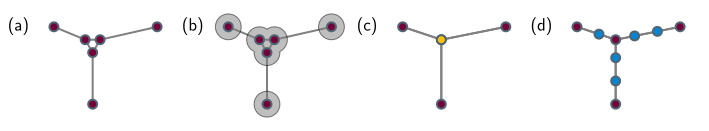

In [10]:


G = nx.Graph()

eps = 1/np.sqrt(3)
a = 5

nodes = [
    # (label), coords
    ('a', (0,-1)),
    ('b', (eps,0)),
    ('c', (-eps,0)),
    ('aa', (0,-5)),
    ('bb', (5,1)),
    ('cc', (-3,1)),
]

RADIUS = 1
points = {}
for node, pos in nodes:
    G.add_node(node, pos=pos)
    p = Point(*pos).buffer(RADIUS)
    points[node] = p
    
for u,v in [('a', 'b'), ('b', 'c'), ('c', 'a'), ('a', 'aa'), ('b', 'bb'), ('c', 'cc')]:
    G.add_edge(u,v)
    
    
def draw_merge_patch(ax):
    pa, pb, pc = points['a'], points['b'], points['c']
    comp = cascaded_union(points.values())
    #comp = pa.union(pb).union(pc)

    patch = PolygonPatch(comp, facecolor='grey', edgecolor='k', alpha=0.5, zorder=1)
    ax.add_patch(patch)  

draw_node_wo_color_kwargs = dict(node_size=80, linewidths=2, edgecolors='xkcd:slate')
draw_node_kwargs = draw_node_wo_color_kwargs.copy()
draw_node_kwargs['node_color'] = 'xkcd:merlot'
draw_edge_kwargs = dict(width=2, alpha=1, edge_color='grey')

def draw_g(ax, G, nodelist = None, node_color=None):
    if nodelist is None:
        nodelist = G.nodes()
    if node_color is None:
        node_drawing_kwargs = draw_node_kwargs
    else:
        node_drawing_kwargs = draw_node_wo_color_kwargs.copy()
        node_drawing_kwargs['node_color'] = node_color
        
    nx.draw_networkx_nodes(G, pos={n:G.node[n]['pos'] for n in G.nodes()}, nodelist=nodelist, ax=ax, **node_drawing_kwargs)
    nx.draw_networkx_edges(G, pos={n:G.node[n]['pos'] for n in G.nodes()}, ax=ax, **draw_edge_kwargs)

    
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(12,4))

for ax in (ax1, ax2, ax3, ax4):
    ax.set_aspect('equal')
    ax.axis('off')

for ax in (ax1, ax2):
    draw_g(ax, G)

draw_merge_patch(ax2)

H = G.copy()
H.add_node('e', pos=(0,0))
H.add_edges_from((['aa', 'e'], ['bb', 'e'], ['cc', 'e']))
H.remove_nodes_from(['a', 'b', 'c'])

draw_g(ax3, H)
draw_g(ax3, H, nodelist=['e'], node_color='xkcd:goldenrod')

    
J = H.copy()
for u in ['aa', 'bb', 'cc']:
    v = 'e'
    x, y = np.array(J.node[u]['pos']), np.array(J.node[v]['pos'])
    elen = np.linalg.norm(y-x)
    
    targen_elen = 1.8
    n = 1
    for int_node_num in range(1, int(elen/targen_elen)+1):
        frac = targen_elen*int_node_num/elen
        pos = x+frac*(y-x)

        J.add_node(f'{u}_{v}_{int_node_num}', pos=pos)
    
draw_g(ax4, H)
new_nodes = set(J.nodes())-set(H.nodes())
draw_g(ax4, J, nodelist=new_nodes, node_color='xkcd:cerulean')


for ax in (ax1, ax2, ax3, ax4):
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    
    delta = 1.2
    ax.set_xlim(xmin-delta, xmax+delta)
    ax.set_ylim(ymin-delta, ymax+delta)
    

ax1.text(-0.1, 0.8, '(a)', horizontalalignment='center', transform=ax1.transAxes, fontsize=18)
ax2.text(-0.1, 0.8, '(b)', horizontalalignment='center', transform=ax2.transAxes, fontsize=18)
ax3.text(-0.1, 0.8, '(c)', horizontalalignment='center', transform=ax3.transAxes, fontsize=18)
ax4.text(-0.1, 0.8, '(d)', horizontalalignment='center', transform=ax4.transAxes, fontsize=18)
#fig.tight_layout(rect=(0,-300,1,300))

fig.savefig("coarse_graining_illustration.pdf", bbox_inches='tight')

## Illustrations on the bias in pickup insertion

### Load the data for the 100 node ring

In [11]:
PICKLE_FILE = '../data/ring_100.pkl'


with open(PICKLE_FILE, 'rb') as f:
    result = pickle.load(f)

INS_DATA_COLUMNS = ['time', 'stoplist_len', 'stoplist_volume', 'rest_stoplist_volume',
                    'pickup_idx', 'dropoff_idx', 'insertion_type', 'pickup_enroute',
                    'dropoff_enroute']
x_range = np.array(sorted(result.keys()))

all_dfs = []

for x in x_range:
    ins_df = pd.DataFrame(result[x]['insertion_data'], 
                          columns = INS_DATA_COLUMNS)
    ins_df.loc[:, 'x'] = x
    # cut out transients
    ins_df = ins_df[ins_df['time'] * ins_df['x'] > 80000]
    all_dfs.append(ins_df)
    
master_ins_df = pd.concat(all_dfs)
master_ins_df.head()

,time,stoplist_len,stoplist_volume,rest_stoplist_volume,pickup_idx,dropoff_idx,insertion_type,pickup_enroute,dropoff_enroute,x
1523,800028.957088,1,0,0,1,1,3,False,False,0.1
1524,801211.509151,1,0,0,1,1,3,False,False,0.1
1525,802847.749277,1,0,0,1,1,3,False,False,0.1
1526,804164.139077,1,0,0,1,1,3,False,False,0.1
1527,804957.397464,1,0,0,1,1,3,False,False,0.1


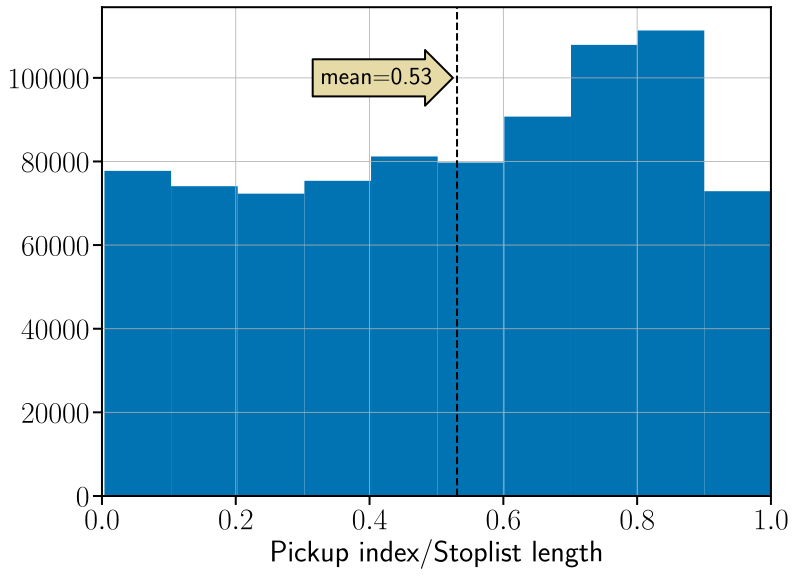

In [12]:
fig, ax = plt.subplots(figsize=(12, 9))

(master_ins_df['pickup_idx']/master_ins_df['stoplist_len']).hist(ax=ax)

mean = (master_ins_df['pickup_idx']/master_ins_df['stoplist_len']).mean()

ax.axvline(x=mean, c='k', linewidth=2, linestyle='--')

ax.set_xlabel("Pickup index/Stoplist length")

bbox_props = dict(boxstyle="rarrow,pad=0.3", fc="xkcd:beige", ec="k", lw=2)
t = ax.text(mean*0.93, 100000, f"mean={mean:.2f}", ha="right", va="center", rotation=0,
            size=25,
            bbox=bbox_props)


ax.set_xlim(0,1)
fig.savefig("illustration_skew_pickup_location.pdf", bbox_inches='tight')